In [1]:
import pandas as pd
import numpy as np

In [2]:
iris=pd.read_csv("C:\\Users\\PRASHANT\\Desktop\\tensorflow udemy course\\TF_2_Notebooks_and_Data\\DATA\\iris.csv")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
X=iris.drop('species',axis=1)

In [5]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y=iris['species']

In [7]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [8]:
#X is 2d matrix and y is one dimensional matrix

In [9]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
#here there are three classes

In [11]:
from sklearn.preprocessing import LabelBinarizer

In [12]:
 encoder=LabelBinarizer()

In [13]:
y=encoder.fit_transform(y)

In [14]:
y  # y is now one hot encoded

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [15]:
#y is 1 or 0 based on species

In [16]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [17]:
# 1 0 0 in one hot encoded means flower is setosa and 0 1 0 means flower is versicolor 

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [21]:
scaler=MinMaxScaler()

In [22]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [23]:
scaled_X_train=scaler.transform(X_train)

In [24]:
scaler_X_test=scaler.transform(X_test)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
model=Sequential()
model.add(Dense(units=4,activation='relu',input_shape=[4,]))
#sinc there are only 4 feature and we are not worry about batches hence input shape is [4,]
model.add(Dense(units=3,activation='softmax'))# output belong to three class
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])#in metrics we specify that we will keep
#trac of accuracy

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stopping=EarlyStopping(patience=10)

In [29]:
model.fit(x=scaled_X_train,y=y_train,epochs=300,validation_data=(scaler_X_test,y_test),callbacks=[early_stopping])

Train on 120 samples, validate on 30 samples
Epoch 1/300
120/120 [==============================] - 4s 36ms/sample - loss: 1.1839 - accuracy: 0.3500 - val_loss: 1.2260 - val_accuracy: 0.2667
Epoch 2/300
120/120 [==============================] - 0s 1ms/sample - loss: 1.1805 - accuracy: 0.3500 - val_loss: 1.2229 - val_accuracy: 0.2667
Epoch 3/300
120/120 [==============================] - 0s 796us/sample - loss: 1.1778 - accuracy: 0.3500 - val_loss: 1.2194 - val_accuracy: 0.2667
Epoch 4/300
120/120 [==============================] - 0s 445us/sample - loss: 1.1748 - accuracy: 0.3500 - val_loss: 1.2159 - val_accuracy: 0.2667
Epoch 5/300
120/120 [==============================] - 0s 461us/sample - loss: 1.1718 - accuracy: 0.3500 - val_loss: 1.2128 - val_accuracy: 0.2667
Epoch 6/300
120/120 [==============================] - 0s 605us/sample - loss: 1.1691 - accuracy: 0.3500 - val_loss: 1.2097 - val_accuracy: 0.2667
Epoch 7/300
120/120 [==============================] - 0s 421us/sample - los

120/120 [==============================] - 0s 456us/sample - loss: 1.0491 - accuracy: 0.3833 - val_loss: 1.0925 - val_accuracy: 0.3000
Epoch 57/300
120/120 [==============================] - 0s 816us/sample - loss: 1.0455 - accuracy: 0.3833 - val_loss: 1.0886 - val_accuracy: 0.3333
Epoch 58/300
120/120 [==============================] - 0s 731us/sample - loss: 1.0422 - accuracy: 0.3917 - val_loss: 1.0848 - val_accuracy: 0.4000
Epoch 59/300
120/120 [==============================] - 0s 556us/sample - loss: 1.0394 - accuracy: 0.3917 - val_loss: 1.0815 - val_accuracy: 0.4000
Epoch 60/300
120/120 [==============================] - 0s 717us/sample - loss: 1.0366 - accuracy: 0.4083 - val_loss: 1.0787 - val_accuracy: 0.4000
Epoch 61/300
120/120 [==============================] - 0s 513us/sample - loss: 1.0339 - accuracy: 0.4083 - val_loss: 1.0757 - val_accuracy: 0.4000
Epoch 62/300
120/120 [==============================] - 0s 738us/sample - loss: 1.0312 - accuracy: 0.4083 - val_loss: 1.0732 

120/120 [==============================] - 0s 836us/sample - loss: 0.8715 - accuracy: 0.7333 - val_loss: 0.9210 - val_accuracy: 0.6333
Epoch 112/300
120/120 [==============================] - 0s 585us/sample - loss: 0.8679 - accuracy: 0.7417 - val_loss: 0.9175 - val_accuracy: 0.6667
Epoch 113/300
120/120 [==============================] - 0s 584us/sample - loss: 0.8645 - accuracy: 0.7417 - val_loss: 0.9140 - val_accuracy: 0.7000
Epoch 114/300
120/120 [==============================] - 0s 849us/sample - loss: 0.8609 - accuracy: 0.7417 - val_loss: 0.9105 - val_accuracy: 0.7000
Epoch 115/300
120/120 [==============================] - 0s 865us/sample - loss: 0.8574 - accuracy: 0.7417 - val_loss: 0.9070 - val_accuracy: 0.7000
Epoch 116/300
120/120 [==============================] - 0s 762us/sample - loss: 0.8539 - accuracy: 0.7500 - val_loss: 0.9042 - val_accuracy: 0.7000
Epoch 117/300
120/120 [==============================] - 0s 542us/sample - loss: 0.8504 - accuracy: 0.7583 - val_loss: 0

120/120 [==============================] - 0s 433us/sample - loss: 0.7017 - accuracy: 0.8083 - val_loss: 0.7539 - val_accuracy: 0.8000
Epoch 167/300
120/120 [==============================] - 0s 680us/sample - loss: 0.6993 - accuracy: 0.8000 - val_loss: 0.7514 - val_accuracy: 0.8000
Epoch 168/300
120/120 [==============================] - 0s 459us/sample - loss: 0.6969 - accuracy: 0.8000 - val_loss: 0.7494 - val_accuracy: 0.7667
Epoch 169/300
120/120 [==============================] - 0s 785us/sample - loss: 0.6944 - accuracy: 0.8000 - val_loss: 0.7471 - val_accuracy: 0.7667
Epoch 170/300
120/120 [==============================] - 0s 793us/sample - loss: 0.6920 - accuracy: 0.7917 - val_loss: 0.7450 - val_accuracy: 0.7667
Epoch 171/300
120/120 [==============================] - 0s 554us/sample - loss: 0.6895 - accuracy: 0.7917 - val_loss: 0.7425 - val_accuracy: 0.7667
Epoch 172/300
120/120 [==============================] - 0s 517us/sample - loss: 0.6871 - accuracy: 0.8000 - val_loss: 0

Epoch 221/300
120/120 [==============================] - 0s 446us/sample - loss: 0.5907 - accuracy: 0.8333 - val_loss: 0.6398 - val_accuracy: 0.8667
Epoch 222/300
120/120 [==============================] - 0s 566us/sample - loss: 0.5890 - accuracy: 0.8333 - val_loss: 0.6383 - val_accuracy: 0.8667
Epoch 223/300
120/120 [==============================] - 0s 785us/sample - loss: 0.5874 - accuracy: 0.8333 - val_loss: 0.6368 - val_accuracy: 0.8667
Epoch 224/300
120/120 [==============================] - 0s 589us/sample - loss: 0.5858 - accuracy: 0.8333 - val_loss: 0.6354 - val_accuracy: 0.8667
Epoch 225/300
120/120 [==============================] - 0s 702us/sample - loss: 0.5842 - accuracy: 0.8333 - val_loss: 0.6338 - val_accuracy: 0.8667
Epoch 226/300
120/120 [==============================] - 0s 493us/sample - loss: 0.5828 - accuracy: 0.8333 - val_loss: 0.6325 - val_accuracy: 0.8667
Epoch 227/300
120/120 [==============================] - ETA: 0s - loss: 0.5822 - accuracy: 0.78 - 0s 869u

Epoch 276/300
120/120 [==============================] - 0s 447us/sample - loss: 0.5134 - accuracy: 0.8333 - val_loss: 0.5620 - val_accuracy: 0.9000
Epoch 277/300
120/120 [==============================] - 0s 445us/sample - loss: 0.5122 - accuracy: 0.8333 - val_loss: 0.5607 - val_accuracy: 0.9000
Epoch 278/300
120/120 [==============================] - 0s 487us/sample - loss: 0.5110 - accuracy: 0.8333 - val_loss: 0.5593 - val_accuracy: 0.9000
Epoch 279/300
120/120 [==============================] - 0s 799us/sample - loss: 0.5099 - accuracy: 0.8333 - val_loss: 0.5579 - val_accuracy: 0.9000
Epoch 280/300
120/120 [==============================] - 0s 930us/sample - loss: 0.5086 - accuracy: 0.8333 - val_loss: 0.5568 - val_accuracy: 0.9000
Epoch 281/300
120/120 [==============================] - 0s 587us/sample - loss: 0.5076 - accuracy: 0.8333 - val_loss: 0.5557 - val_accuracy: 0.9000
Epoch 282/300
120/120 [==============================] - 0s 835us/sample - loss: 0.5065 - accuracy: 0.8333

In [30]:
metrics=pd.DataFrame(model.history.history)

In [31]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.183851,0.350000,1.225993,0.266667
1,1.180459,0.350000,1.222851,0.266667
2,1.177767,0.350000,1.219367,0.266667
3,1.174800,0.350000,1.215927,0.266667
4,1.171811,0.350000,1.212813,0.266667
...,...,...,...,...
295,0.490586,0.841667,0.538507,0.900000
296,0.489487,0.841667,0.537400,0.900000
297,0.488441,0.841667,0.536397,0.900000
298,0.487403,0.841667,0.535396,0.900000


In [32]:
import matplotlib.pyplot as plt

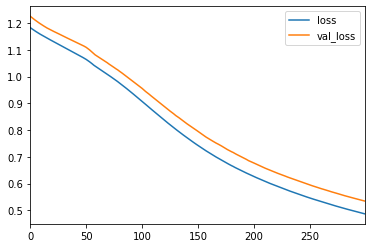

In [33]:
metrics[['loss','val_loss']].plot()

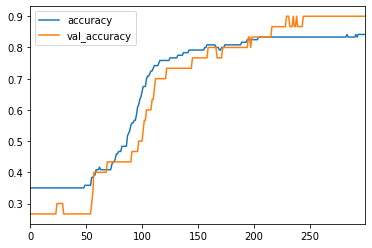

In [34]:
metrics[['accuracy','val_accuracy']].plot()

In [35]:
model.evaluate(x=scaled_X_train,y=y_train,verbose=0)

[0.4855556885401408, 0.84166664]

In [36]:
model.evaluate(x=scaler_X_test,y=y_test,verbose=0)

[0.5342098474502563, 0.9]

In [37]:
model.metrics_names

['loss', 'accuracy']

In [38]:
#if you are ready for your model for deployment you can deploy it now

before deploying we want to make sure that we use all our data

hence we will train on al our data

In [39]:
epochs=len(metrics) #we run for same no of epochs

In [40]:
epochs

300

In [41]:
scaled_X=scaler.fit_transform(X)

In [42]:
model=Sequential()
model.add(Dense(units=4,activation='relu',input_shape=[4,]))
#sinc there are only 4 feature and we are not worry about batches hence input shape is [4,]
model.add(Dense(units=3,activation='softmax'))# output belong to three class
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])#in metrics we specify that we will keep
#trac of accuracy

In [43]:
model.fit(scaled_X,y,epochs=epochs)

Train on 150 samples
Epoch 1/300
150/150 [==============================] - 1s 6ms/sample - loss: 1.1321 - accuracy: 0.3333
Epoch 2/300
150/150 [==============================] - 0s 95us/sample - loss: 1.1202 - accuracy: 0.3333
Epoch 3/300
150/150 [==============================] - 0s 96us/sample - loss: 1.1096 - accuracy: 0.3333
Epoch 4/300
150/150 [==============================] - 0s 112us/sample - loss: 1.0997 - accuracy: 0.3333
Epoch 5/300
150/150 [==============================] - 0s 91us/sample - loss: 1.0895 - accuracy: 0.3333
Epoch 6/300
150/150 [==============================] - 0s 92us/sample - loss: 1.0800 - accuracy: 0.3333
Epoch 7/300
150/150 [==============================] - 0s 71us/sample - loss: 1.0711 - accuracy: 0.3400
Epoch 8/300
150/150 [==============================] - 0s 107us/sample - loss: 1.0631 - accuracy: 0.3600
Epoch 9/300
150/150 [==============================] - 0s 119us/sample - loss: 1.0547 - accuracy: 0.3800
Epoch 10/300
150/150 [===================

150/150 [==============================] - 0s 107us/sample - loss: 0.6797 - accuracy: 0.7200
Epoch 79/300
150/150 [==============================] - 0s 103us/sample - loss: 0.6753 - accuracy: 0.7200
Epoch 80/300
150/150 [==============================] - 0s 102us/sample - loss: 0.6709 - accuracy: 0.7200
Epoch 81/300
150/150 [==============================] - 0s 123us/sample - loss: 0.6665 - accuracy: 0.7200
Epoch 82/300
150/150 [==============================] - 0s 118us/sample - loss: 0.6622 - accuracy: 0.7200
Epoch 83/300
150/150 [==============================] - 0s 127us/sample - loss: 0.6579 - accuracy: 0.7200
Epoch 84/300
150/150 [==============================] - 0s 126us/sample - loss: 0.6538 - accuracy: 0.7200
Epoch 85/300
150/150 [==============================] - 0s 105us/sample - loss: 0.6496 - accuracy: 0.7200
Epoch 86/300
150/150 [==============================] - 0s 122us/sample - loss: 0.6456 - accuracy: 0.7200
Epoch 87/300
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 111us/sample - loss: 0.4755 - accuracy: 0.8333
Epoch 155/300
150/150 [==============================] - 0s 108us/sample - loss: 0.4739 - accuracy: 0.8333
Epoch 156/300
150/150 [==============================] - 0s 99us/sample - loss: 0.4723 - accuracy: 0.8400
Epoch 157/300
150/150 [==============================] - 0s 88us/sample - loss: 0.4709 - accuracy: 0.8400
Epoch 158/300
150/150 [==============================] - 0s 107us/sample - loss: 0.4693 - accuracy: 0.8467
Epoch 159/300
150/150 [==============================] - 0s 108us/sample - loss: 0.4678 - accuracy: 0.8467
Epoch 160/300
150/150 [==============================] - 0s 128us/sample - loss: 0.4663 - accuracy: 0.8467
Epoch 161/300
150/150 [==============================] - 0s 119us/sample - loss: 0.4648 - accuracy: 0.8533
Epoch 162/300
150/150 [==============================] - 0s 123us/sample - loss: 0.4634 - accuracy: 0.8533
Epoch 163/300
150/150 [==============================

150/150 [==============================] - 0s 110us/sample - loss: 0.3843 - accuracy: 0.9000
Epoch 231/300
150/150 [==============================] - 0s 150us/sample - loss: 0.3834 - accuracy: 0.9000
Epoch 232/300
150/150 [==============================] - 0s 115us/sample - loss: 0.3823 - accuracy: 0.9000
Epoch 233/300
150/150 [==============================] - 0s 118us/sample - loss: 0.3813 - accuracy: 0.9000
Epoch 234/300
150/150 [==============================] - 0s 116us/sample - loss: 0.3803 - accuracy: 0.9000
Epoch 235/300
150/150 [==============================] - 0s 111us/sample - loss: 0.3793 - accuracy: 0.9000
Epoch 236/300
150/150 [==============================] - 0s 96us/sample - loss: 0.3785 - accuracy: 0.9000
Epoch 237/300
150/150 [==============================] - ETA: 0s - loss: 0.3797 - accuracy: 0.90 - 0s 124us/sample - loss: 0.3774 - accuracy: 0.9067
Epoch 238/300
150/150 [==============================] - 0s 103us/sample - loss: 0.3763 - accuracy: 0.9067
Epoch 239/

In [44]:
model.save("final_iris_model_self.h5")

In [45]:
#we have to save scaler itself

In [46]:
#new data have to save scaler itself

In [47]:
import joblib # it is built in python hence we don't need to download anything to run it

In [48]:
joblib.dump(scaler,"iris_scaler.pkl")# we need to pass as value object and filename in which to save it
#we need to save it in pikle file ie .pkl extension

['iris_scaler.pkl']

In [49]:
#we save our model in .h5 model and scaler in .pkl

In [50]:
 from tensorflow.keras.models import load_model

In [51]:
flower_model=load_model('final_iris_model_self.h5')

In [52]:
flower_scaler=joblib.load("iris_scaler.pkl")

In [53]:
#based on this model we can predict something

In [54]:
#in next lecture we are going to how to take example json file flower_model and flower_scaler and return back example json file

# creating prediction function

we take dat process data and return data in prediction

jason is used for this data data exchange and jason stand for JAVSCRIPT OBJECT NOTATION

#json is similar to python dictionary

In [55]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [56]:
#exaple data point will actually look like

In [57]:
flower_example={
    
                    "sepal_length":5.1,
                    "sepal_width":3.5,
                    "petal_length":1.4,
                    "petal_width":0.2,
                        
                }

In [58]:
type(flower_example)

dict

In [59]:
encoder.classes_ # the order is same in which we have transformed our y in on binary encoding

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [60]:
def return_prediction(model,scaler,sample_json):
    s_len=sample_json['sepal_length']
    s_wid=sample_json['sepal_width']
    p_len=sample_json['petal_length']
    p_wid=sample_json['petal_width']
    classes=np.array(['setosa', 'versicolor', 'virginica'])
    flower=[[s_len,s_wid,p_len,p_wid]]   #model expect in this format hence we pass this
    flower=scaler.transform(flower)     # scaling flower based on scaler passed
    class_ind=model.predict_classes(flower)[0]
    # model return indices of flower as 0 1 or 2 accordingly in order as in classes
    #model return array
    return classes[class_ind]

In [61]:
return_prediction(flower_model,flower_scaler,flower_example)

'setosa'

# code for deployment

In [62]:
# whatever code we need for deployment we will take in single cell

In [63]:
from tensorflow.keras.models import load_model
import joblib
import numpy as np

flower_model=load_model('final_iris_model_self.h5')
flower_scaler=joblib.load("iris_scaler.pkl")
def return_prediction(model,scaler,sample_json):
    s_len=sample_json['sepal_length']
    s_wid=sample_json['sepal_width']
    p_len=sample_json['petal_length']
    p_wid=sample_json['petal_width']
    classes=np.array(['setosa', 'versicolor', 'virginica'])
    flower=[[s_len,s_wid,p_len,p_wid]]   #model expect in this format hence we pass this
    flower=scaler.transform(flower)     # scaling flower based on scaler passed
    class_ind=model.predict_classes(flower)[0]
    # model return indices of flower as 0 1 or 2 accordingly in order as in classes
    #model return array
    return classes[class_ind]
return_prediction(flower_model,flower_scaler,flower_example)


'setosa'

In [64]:
# only this much code we will need to launch our flask application

In [65]:
# we will deploy our model using prediction function

In [66]:
# flask is python based web application framework

In [67]:
#flask uses backend to handle backend of web application

In [68]:
# we can later connect flask to frontend component such as html and css

In [69]:
# we will integrate tensorflow model and prediction function inside flask application

In [70]:
# we need to interact with falask application

In [71]:
#there are two way to do this
    # API REQUEST
    #postman  is a program which can send json information to flask application interactiong with it
    #and it get back result from model
    
    #we can do it with python as well
        #we can use request library built in python send that over jason information and get result

In [72]:
# after that we connect flask with html form

In [73]:
#user will visit a application they will provide number for each of model , model runs through prediction 
#and return on new page prediction